<img src="https://github.com/Center-for-Health-Data-Science/PythonTsunami/blob/spring2022/figures/HeaDS_logo_large_withTitle.png?raw=1" width="300">

<img src="https://github.com/Center-for-Health-Data-Science/PythonTsunami/blob/spring2022/figures/tsunami_logo.PNG?raw=1" width="600">

# Principal Component Analysis in scikit learn

**Principal component analysis** (PCA) is a linear dimensionality reduction technique that helps us investigate the structure of high dimensional data.

In this notebook we'll learn how do a PCA with scikit-learn.

We'll again start out be importing some libraries and loading our dataset. Remember to load the dataset we have cleaned in EDA!

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

To read in the dataset you have cleaned during the EDA:

click on 📁 -> upload the csv ⬆ -> specify the name of your file in `read_csv`:

In [ ]:
db_df = pd.read_csv('diabetes_clean.csv')
print(db_df.shape)
db_df.head()

(488, 11)


,ID,Age,Sex,BloodPressure,GeneticRisk,BMI,PhysicalActivity,Married,Work,Smoker,Diabetes
0,9046,34,Male,84,0.619,24.7,93,Yes,Self-employed,Unknown,0
1,51676,25,Male,74,0.591,22.5,102,No,Public,Unknown,0
2,60182,50,Male,80,0.178,34.5,98,Yes,Self-employed,Unknown,1
3,1665,27,Female,60,0.206,26.3,82,Yes,Private,Never,0
4,56669,35,Male,84,0.286,35.0,58,Yes,Private,Smoker,1


If you don't have the cleaned file or have trouble uploading it you can use the version from our github:

In [ ]:
#@title Load the file from github instead

link_to_file = "https://raw.githubusercontent.com/Center-for-Health-Data-Science/Python_part2/main/data/diabetes_clean.csv"
db_df = pd.read_csv(link_to_file)
print(db_df.shape)
db_df.head()

## Exercise 1 (5 mins)

As a first step, we need to subset our dataset to only the numeric features, and also convert it into a numpy array for scikit learn. We'll call this array `numeric`.

In [ ]:
numeric = ???

## Scaling and Centering the data

Now we need our data to be scaled and centered.

**Centered** means that the distribution has been moved from where its mean originally was to 0, by substracting the mean from each observation.

**Scaled** means that the standard deviation has been rescaled to 1, by dividing each observation by the original standard deviation.

<img src="https://github.com/Center-for-Health-Data-Science/Python_part2/blob/main/teachers/figures/scale_and_center.PNG?raw=1" width="300">

Let's have a look at our original data:

In [ ]:
#casting the np array back to a dataframe to we can use .describe
pd.DataFrame(numeric, columns = ['Age', 'BloodPressure','GeneticRisk','BMI','PhysicalActivity']).describe()

,Age,BloodPressure,GeneticRisk,BMI,PhysicalActivity
count,488.000000,488.000000,488.000000,488.000000,488.000000
mean,33.752049,72.795082,0.483633,30.194672,84.260246
std,11.327584,12.889477,0.321207,6.669993,25.222865
min,21.000000,30.000000,0.078000,15.300000,19.000000
25%,24.000000,64.000000,0.254000,24.900000,66.000000
50%,30.500000,72.000000,0.407000,30.500000,80.000000
75%,41.000000,80.000000,0.637250,34.625000,99.000000
max,81.000000,114.000000,2.420000,57.100000,177.000000


Our features are on pretty different scales, from the genetic risk score that is between 0.07 and 2.4 up to the physical activity that goes up to 177.

We'll use the `StandardScaler` from scikitlearn to center and scale each column.

First, we have to define a scaler object. We can name this whatever we want. I'm using the default parameters of the `StandardScaler` so I don't need to put anything in the brackets.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaling = StandardScaler()

In [ ]:
#Lets have a look.
scaling

StandardScaler()

Now, we put our data into the scaler and receive the scaled and centered output:

* `numeric` is the numpy array of our original data.
* `db_scale` is the numpy array of our scaled data that we are creating
*`scaling` is the name of the scaler object we have created
* `fit_transform` is the method we use to achieve the scaling


In [ ]:
#making a new numpy array with scaled data
db_scale = scaling.fit_transform(numeric)
db_scale

array([[ 0.02191158,  0.87019947,  0.4218644 , -0.82463519,  0.34685681],
       [-0.77342442,  0.09357668,  0.33460369, -1.1548091 ,  0.70404207],
       [ 1.43584224,  0.55955035, -0.95249176,  0.64613953,  0.54529307],
       ...,
       [ 0.28702358,  0.87019947,  0.66183135, -0.854651  ,  1.7359106 ],
       [-0.41994175,  1.02552403,  1.01087419,  0.81122648, -1.32000772],
       [ 0.11028225,  1.33617314, -0.52865404,  0.94629763, -0.3675137 ]])

Let's see what has happened to our data. We'll again cast both `numeric` and `db_scale` into pandas dfs so that we can use the describe method to get summary stats.

In [ ]:
#original data
pd.DataFrame(numeric, columns = ['Age', 'BloodPressure','GeneticRisk','BMI','PhysicalActivity']).describe()

,Age,BloodPressure,GeneticRisk,BMI,PhysicalActivity
count,493.000000,493.000000,493.000000,493.000000,493.000000
mean,33.835700,72.742394,0.482868,30.169777,84.212982
std,11.381387,12.868178,0.320093,6.670332,25.125564
min,21.000000,30.000000,0.078000,15.300000,19.000000
25%,24.000000,64.000000,0.254000,24.900000,66.000000
50%,31.000000,72.000000,0.407000,30.500000,80.000000
75%,41.000000,80.000000,0.637000,34.600000,99.000000
max,81.000000,114.000000,2.420000,57.100000,177.000000


In [ ]:
#scaled and centered
pd.DataFrame(db_scale, columns = ['Age', 'BloodPressure','GeneticRisk','BMI','PhysicalActivity']).describe()

,Age,BloodPressure,GeneticRisk,BMI,PhysicalActivity
count,4.880000e+02,4.880000e+02,4.880000e+02,4.880000e+02,4.880000e+02
mean,2.548053e-16,-5.423712e-16,9.464196e-17,-9.100189e-17,-2.766457e-16
std,1.001026e+00,1.001026e+00,1.001026e+00,1.001026e+00,1.001026e+00
min,-1.126907e+00,-3.323564e+00,-1.264137e+00,-2.235378e+00,-2.590000e+00
25%,-8.617951e-01,-6.830461e-01,-7.156413e-01,-7.946194e-01,-7.246990e-01
50%,-2.873858e-01,-6.174788e-02,-2.388238e-01,4.582332e-02,-1.690774e-01
75%,6.405062e-01,5.595504e-01,4.787397e-01,6.648994e-01,5.849803e-01
max,4.175333e+00,3.200068e+00,6.034598e+00,4.037926e+00,3.680586e+00


## Exercise 2 (5 mins)

Discuss at your table:

* What do you see in the tables above? How has the data changed?
* What are steps we have done so far?


## Performing the PCA

Now that we have prepared out data we can transform it into the space of the principal components.

We again need to define a PCA object. We'll use the first 4 principal components.

In [ ]:
from sklearn.decomposition import PCA
#Init a PCA object
#We'll use the first 4 PCs.
PCA_obj = PCA(n_components = 4)

Just like the scaling object, we can investigate the PCA object we have made:

In [ ]:
PCA_obj

Now, we insert our scaled and centered data:

In [ ]:
transformed = PCA_obj.fit_transform(db_scale)

## Exercise 3 (5 mins)

Have a look at the command above. Analogous to how we disected the scaling command above, which part is the input, output and the PCA object?

## Investigating the PCA output

Let's have a look at the transformed data.

In [ ]:
transformed

array([[-0.16651806, -0.73713042,  0.83058353,  0.09580268],
       [-1.21998644, -0.13657767,  0.80726908,  0.15051314],
       [ 0.69777077, -1.44213811, -0.52126768, -0.09910921],
       ...,
       [-0.69151593, -1.2785098 ,  1.69313988,  0.09615182],
       [ 1.60935478,  0.73951173,  0.36011807,  0.73611603],
       [ 1.14920753, -0.63515778, -0.42704211,  1.09588429]])

In [ ]:
transformed.shape

(488, 4)

We have 488 observations, just like in the original dataset, and 4 columns. Each of the rows in the transformed data corresponds to the same row in the original data, and the columns are the 4 first principal components.

This is the original data, mapped into the new dimensions defined by the prinicipal components.

Going back to the math, if PCA is

$$X = USV^T$$

Then the numpy array '`transformed`' is $US$, the data mapped into the space of the principal components.


Let's plot PCs 1 and 2. We first need a dataframe:

In [ ]:
pca_df = pd.DataFrame(transformed, columns= ['PC1', 'PC2', 'PC3', 'PC4'])
pca_df

,PC1,PC2,PC3,PC4
0,-0.166518,-0.737130,0.830584,0.095803
1,-1.219986,-0.136578,0.807269,0.150513
2,0.697771,-1.442138,-0.521268,-0.099109
3,-1.183386,0.391868,-0.910135,-0.216528
4,1.150921,-0.225082,-0.903728,0.648299
...,...,...,...,...
483,1.253394,-0.708053,-0.260889,0.510031
484,2.030914,-1.049255,0.070843,-0.520961
485,-0.691516,-1.278510,1.693140,0.096152
486,1.609355,0.739512,0.360118,0.736116


Now we can make a scatter plot that shows us the PC1 and PC2 value for each observation, i.e. person in the dataset.

<Axes: xlabel='PC1', ylabel='PC2'>

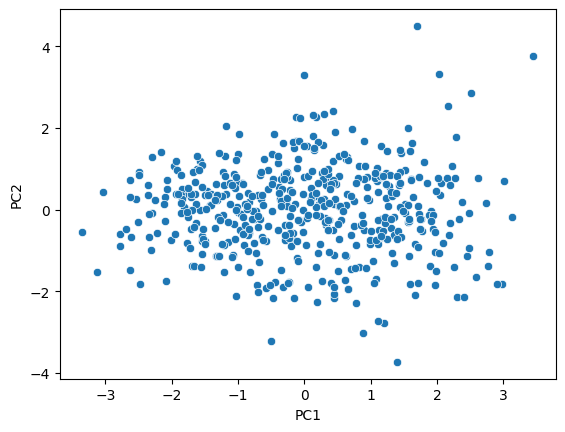

In [ ]:
sns.scatterplot(pca_df, x = 'PC1', y = 'PC2')

## Exercise 4 (10 mins)

Add the column `Diabetes` from the original dataframe to the dataframe with the PCA results (`pca_df`).

Then add this information to the scatter plot as a color.

We see a good separation of diabetic and non-diabetic people, though there is some overlap.

## Visualizing Eigenvectors

Now, we are interested to know how the original dimensions - age, Blood pressure, BMI, ect - map into the PCA space. For this we'll need to look at the Eigenvectors.

<img src="https://github.com/Center-for-Health-Data-Science/Python_part2/blob/main/teachers/figures/pca_what_is_what.PNG?raw=1" width="400">



The Eigenvectors, $V^T$ can be found inside the PCA object and they are called `.components_`.

In [ ]:
PCA_obj.components_

We have four rows which are the four PCs and five columns, one for each original dimension.

We want to project them into the space of the PC, analogous to how we saw in the presentation.

<img src="https://github.com/Center-for-Health-Data-Science/Python_part2/blob/main/teachers/figures/wine_pca_loadings.png?raw=1" width="800">

Eigenvectors always start at the origin (0,0) and then point at the values listed in `PCA_obj.components_`. I.e. the Eigenvector for age starts at (0,0) and should end at (0.45,-0.51). With this information, we can use matplotlib to draw them.

In [ ]:
help(plt.arrow)

Help on function arrow in module matplotlib.pyplot:

arrow(x, y, dx, dy, **kwargs)
    Add an arrow to the Axes.
    
    This draws an arrow from ``(x, y)`` to ``(x+dx, y+dy)``.
    
    Parameters
    ----------
    x, y : float
        The x and y coordinates of the arrow base.
    
    dx, dy : float
        The length of the arrow along x and y direction.
    
    width : float, default: 0.001
        Width of full arrow tail.
    
    length_includes_head : bool, default: False
        True if head is to be counted in calculating the length.
    
    head_width : float or None, default: 3*width
        Total width of the full arrow head.
    
    head_length : float or None, default: 1.5*head_width
        Length of arrow head.
    
    shape : {'full', 'left', 'right'}, default: 'full'
        Draw the left-half, right-half, or full arrow.
    
    overhang : float, default: 0
        Fraction that the arrow is swept back (0 overhang means
        triangular shape). Can be negat

Alright so `plt.arrow(x, y, dx, dy)` draws an arrow from (x,y) to (x+dx,y+dy). Now, we need to address the dx and dy values, i.e. the value for `age` in PC1 and PC2. They are in the first column, row 1 and row 2.

## Exercise 5 (5 mins)

Extract the PC1 and PC2 value for age from `PCA_obj.components_`. They are in the first column, row 1 and row 2. Then insert them in `plt.arrow`.

0.45020083926761423
-0.5106733960878864


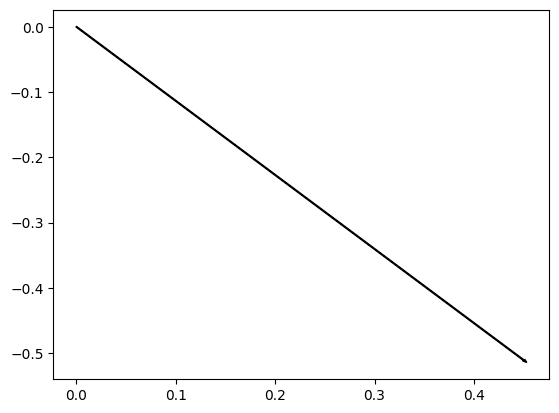

In [ ]:
age_PC1 = ???
age_PC2 = ???

#check values
print(age_PC1)
print(age_PC2)

plt.arrow(0,0,age_PC1,age_PC2, label = 'a')

Note: You might get an arrow that points in exactly the opposite direction from the pre-printed one since directions are invertable in PCA.

Alright, this is one fancy arrow. Can we add another one for the second original feature, blood pressure?

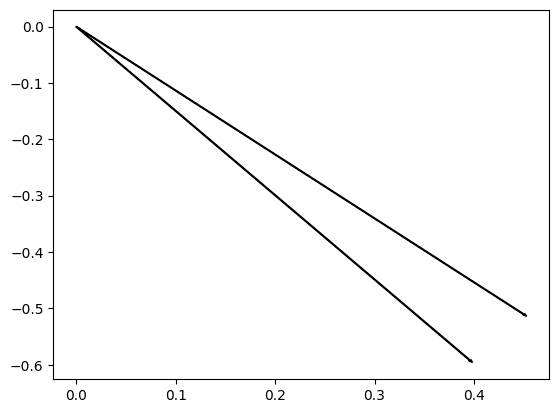

In [ ]:
bp_PC1 = PCA_obj.components_[0, 1]
bp_PC2 = PCA_obj.components_[1, 1]

plt.arrow(0,0,bp_PC1,bp_PC2)
plt.arrow(0,0,age_PC1,age_PC2)

It's getting a bit hard to see which one is which. Let's add some labels.

Text(0.44426295387813175, -0.5172016328422966, 'Age')

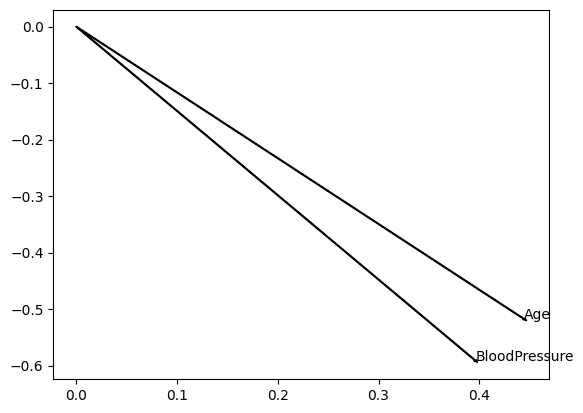

In [ ]:
plt.arrow(0,0,bp_PC1,bp_PC2)
plt.text(bp_PC1,bp_PC2, 'BloodPressure')
plt.arrow(0,0,age_PC1,age_PC2)
plt.text(age_PC1,age_PC2, 'Age')


Looks good so far!

But it is getting a bit tedious to extract the values and then write the plotting command for every original dimension. What an opportune moment to look at the concept of:

## Abstraction

The idea of abstraction is to **wrap complexity** and modularize tasks.

Why do we want this:

* increase readability of code
* increase re-useability of code
* fix things only in one place
* easier and more comprehensive testing since you don't have 15 slightly different versions of the same code doing similar things.

## Exercise 6 (10 mins)

Write a loop that goes through the five original feature in our data: age, blood pressure, the genetic risk score, BMI and physical activity.

For each feature:

* find the Eigenvector value for PC1 and PC2
* plot the Eigenvector as an arrow
* add a label that says which feature the arrow shows

In [ ]:
features = ['Age', 'BloodPressure','GeneticRisk','BMI','PhysicalActivity']

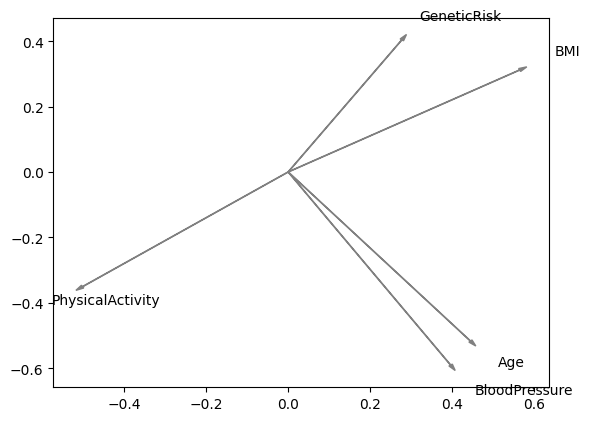

Your solution can be mirror image of the pre-printed one since the direction of each PC is arbitrary. This is not a problem, they will always be internally consistent.

## Bringing it all together: The biplot

Alright, so far we have:

* learned how to scale and center our data
* performed a PCA
* looked into the components of the PCA, such as projected data and Eigenvectors and what they mean
* plotted projected data and colored by the outcome
* plotted Eigenvectors

For the last part of this session, lets put everything together and make a biplot of our PCA. Biplots show both the projected data and the Eigenvectors together and they are very nice for interpretation.



When you look at the plots above you may notice that they are on slightly different scales. This is because Eigenvectors must always be between -1 and 1, but the space defined by the principal components has no such restrictions so data points can have a PC1 value of -3 or 4.

In order to plot Eigenvectors and datapoints together meaningfully it helps if we rescale the PC space to also run between -1 and 1.

Let's have another look at our data projected into the PC space:

In [ ]:
pca_df.describe()

We can see that for example PC1 values range between -3.36 and + 3.49 so the full range of PC1 values is:

In [ ]:
pca_df['PC1'].max() - pca_df['PC1'].min()

However, we would like all the PC1 values to fit in the interval [-1,1], which has a total available range of 2.0. So let's divide 2.0 by the actual CP1 range so make sure it will fit:

In [ ]:
scalePC1 = 2.0/(pca_df['PC1'].max() - pca_df['PC1'].min())
scalePC1

We could also use 1.0 in the numerator, then we would map to the interval [-0.5,05].

We do the same calculation for PC2:

In [ ]:
scalePC2 = 2.0/(pca_df['PC2'].max() - pca_df['PC2'].min())

And make two new columns in the pca_df which are the original PC1 and PC2 values rescaled to fit in the interval [-1,1]:

In [ ]:
pca_df['PC1_scaled'] = pca_df['PC1'] * scalePC1
pca_df['PC2_scaled'] = pca_df['PC2'] * scalePC2
pca_df.describe()

,PC1,PC2,PC3,PC1_scaled,PC2_scaled
count,4.909000e+03,4.909000e+03,4.909000e+03,4909.000000,4.909000e+03
mean,-5.789715e-18,-2.171143e-17,3.039600e-17,0.000000,-4.704143e-18
std,1.225887e+00,9.162334e-01,8.113748e-01,0.340238,2.158959e-01
min,-2.793271e+00,-3.535607e+00,-2.733096e+00,-0.775256,-8.331096e-01
25%,-8.237910e-01,-5.299298e-01,-5.293917e-01,-0.228639,-1.248696e-01
50%,1.345349e-02,1.143662e-01,2.806976e-02,0.003734,2.694858e-02
75%,7.070962e-01,6.271641e-01,4.832196e-01,0.196251,1.477812e-01
max,4.412785e+00,4.952129e+00,6.206195e+00,1.224744,1.166890e+00


We're a bit out of bounds but that's okay. We could add a safety margin to the actual range estimate, i.e. (max - min) + 0.1 if we want to avoid this.

So now we can add a scatterplot of the rescaled projected data to the Eigenvector arrows:

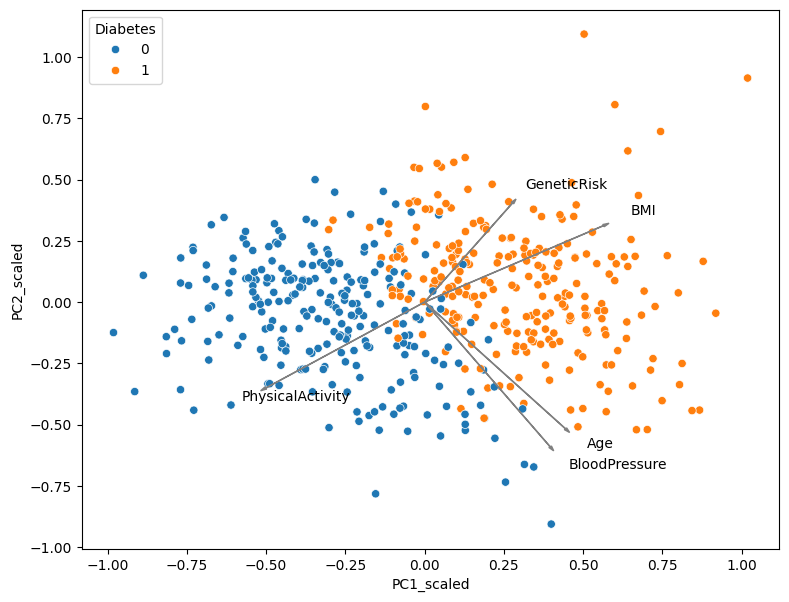

In [ ]:
plt.figure(figsize=(9,7))

#the data projected into PC1 and PC2, colored by outcome
sns.scatterplot(pca_df, x = 'PC1_scaled', y = 'PC2_scaled', hue = 'Diabetes')

#the eigenvectors
for i, feature in enumerate(features):
    plt.arrow(0, 0,
              PCA_obj.components_[0, i],
              PCA_obj.components_[1, i],
              head_width=0.01,
              head_length=0.02,
              color="gray")
    plt.text(PCA_obj.components_[0, i] * 1.15,
            PCA_obj.components_[1, i] * 1.15,
            feature, fontsize=10)

Very nice!

Plotting the projected data and the Eigenvectors together helps us to interpret how the original features influence where a data point ends up and how they contribute to our new dimensions, the PCs.  

Eigenvectors that are pointing in the same direction as a principal component are positively correlated with it. In our example that means that a person with a large BMI value will in general have a larger PC1 value than one with a small BMI value. The opposite is true for the physical activity; a person will a large value in activity will have a lower PC1 value.

We can also see the Eigenvectors of these two dimensions pointing away from each other, meaning these two features tend to behave in opposing ways: people with small BMIs tend to have large physical activity values and vice versa. Eigenvectors pointing in the same direction and close to each other mean these their features are somewhat correlated, i.e. people with a higher age tend to have a higher blood pressure in this dataset.


## Group Exercise (30 mins)

Load in the Boston Housing data from `boston.csv`. Each row describes a zone in the Boston area (so there is more than one house). The dataset is from the 1970s.

The columns are:

* `crim` - per capita crime rate
* `zn` - proportions of plots that are huge (over 2230 sq meters)
* `indus` - proportion of non-retail businesses
* `nox` - Nitrogen oxides concentration (air pollution)
* `rm` - average number of rooms
* `dis` - distance to employment center
* `medv` - median value per house in 1000s


Decide in your group which column is the outcome/target variable. Take out that column and save it somewhere else.

With the rest of the columns, perform PCA like we did above.

Discuss the biplot in your group.


## Bonus Exercise

If you're already done and bored, go back to the original (non-scaled) Boston Housing data and make EDA plots like we have done for the diabetes data. Compare them to what you discussed about the biplot.